# Interpolation Cubique en R

source : https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/splinefun

Perform cubic (or Hermite) spline interpolation of given data points, returning either a list of points obtained by the interpolation or a function performing the interpolation.

https://fr.wikipedia.org/wiki/Spline_cubique_d%27Hermite : In numerical analysis, a cubic Hermite spline or cubic Hermite interpolator is a spline where each piece is a third-degree polynomial specified in Hermite form, that is, by its values and first derivatives at the end points of the corresponding domain interval.

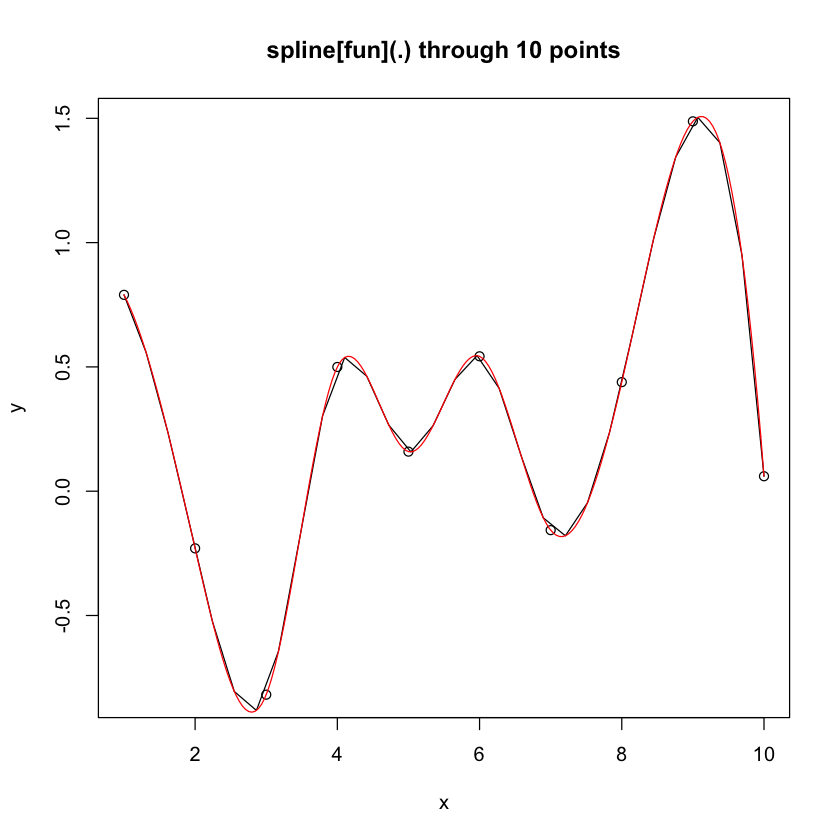

In [19]:
n <- 10
x <- 1:n
y <- rnorm(n)
plot(x, y, main = paste("spline[fun](.) through", n, "points"))
lines(spline(x, y))
lines(spline(x, y, n = 201), col = 2)

Warning message in spline(x, y, n = 201, method = "periodic"):
“spline: first and last y values differ - using y[1] for both”


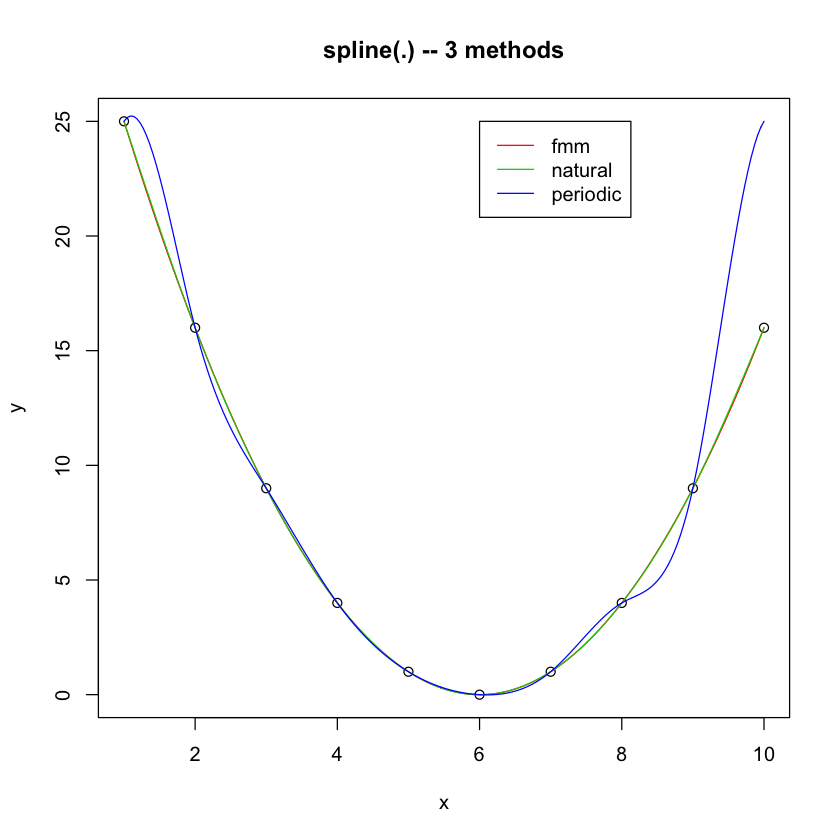

In [9]:
y <- (x-6)^2
plot(x, y, main = "spline(.) -- 3 methods")
lines(spline(x, y, n = 201), col = 2)
lines(spline(x, y, n = 201, method = "natural"), col = 3)
lines(spline(x, y, n = 201, method = "periodic"), col = 4)
legend(6, 25, c("fmm","natural","periodic"), col = 2:4, lty = 1)

[1] "z"

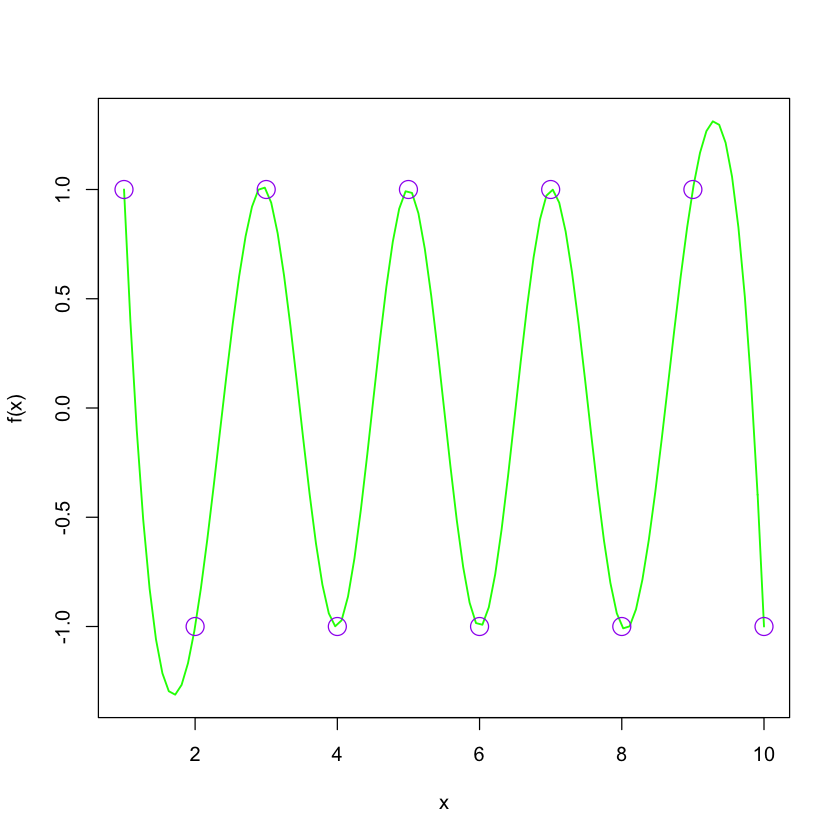

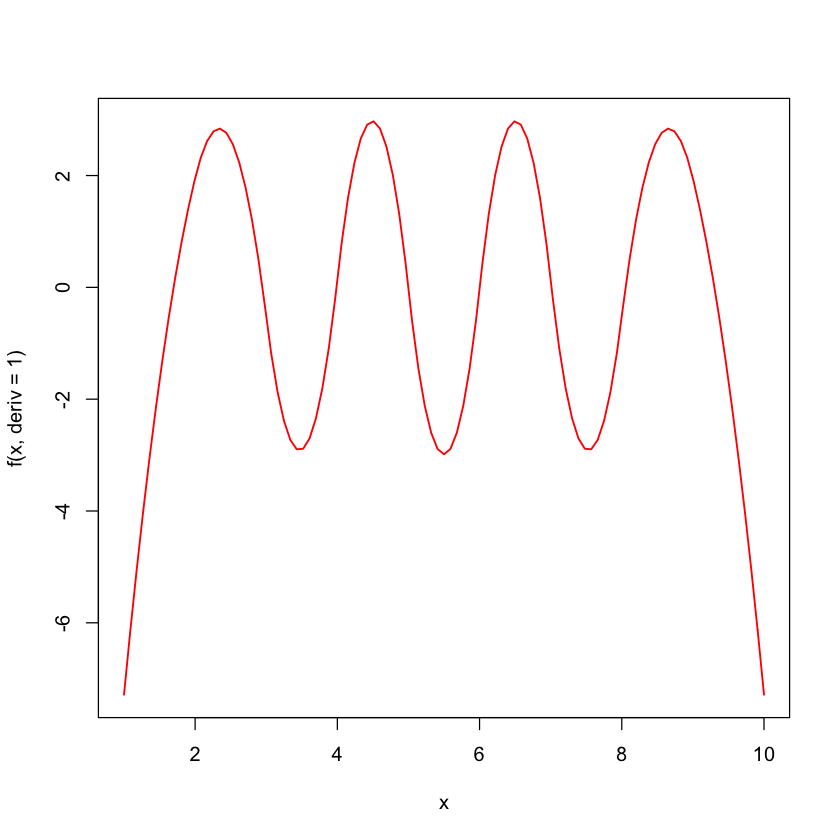

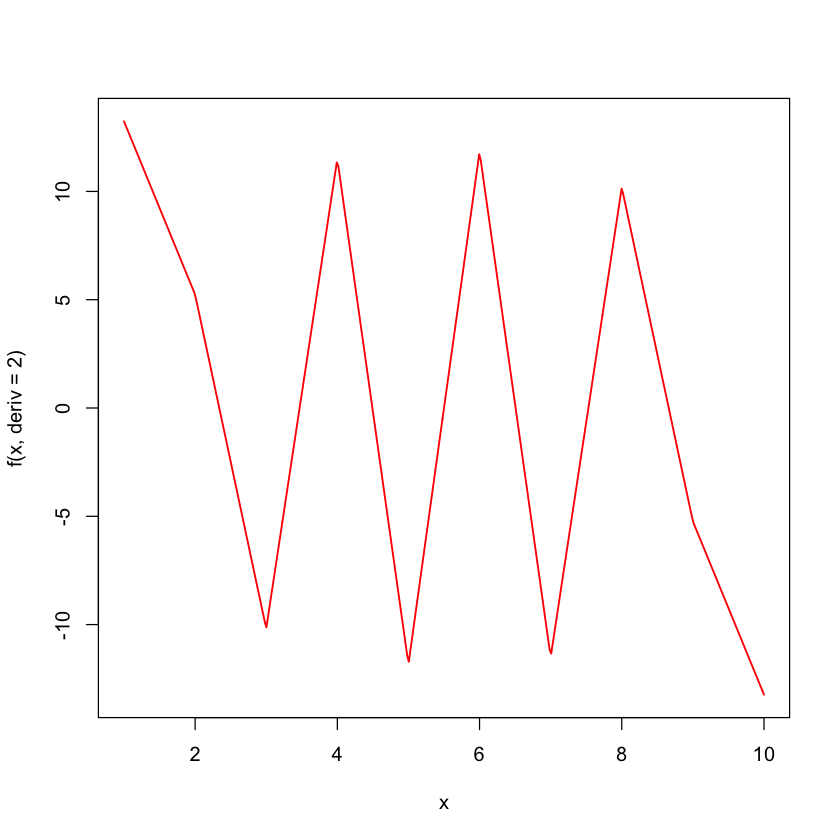

ERROR: Error in par(op): objet 'op' introuvable


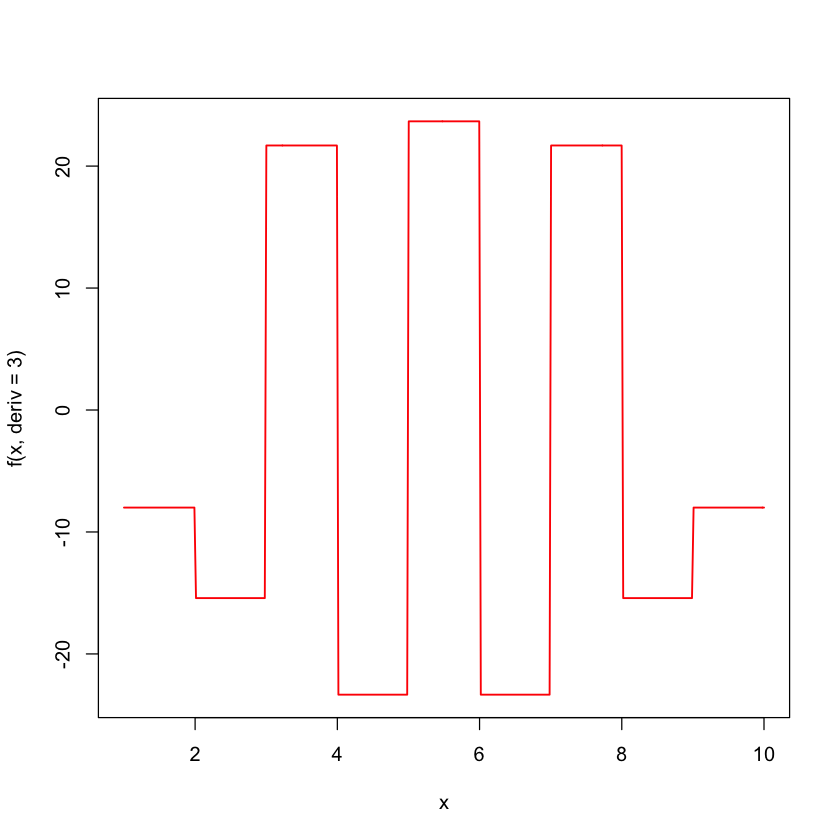

In [10]:
y <- sin((x-0.5)*pi)
f <- splinefun(x, y)
ls(envir = environment(f))
splinecoef <- get("z", envir = environment(f))
curve(f(x), 1, 10, col = "green", lwd = 1.5)
points(splinecoef, col = "purple", cex = 2)
curve(f(x, deriv = 1), 1, 10, col = 2, lwd = 1.5)
curve(f(x, deriv = 2), 1, 10, col = 2, lwd = 1.5, n = 401)
curve(f(x, deriv = 3), 1, 10, col = 2, lwd = 1.5, n = 401)
par(op)

In [11]:
## Manual spline evaluation --- demo the coefficients :
.x <- splinecoef$x
u <- seq(3, 6, by = 0.25)
(ii <- findInterval(u, .x))
dx <- u - .x[ii]
f.u <- with(splinecoef,
            y[ii] + dx*(b[ii] + dx*(c[ii] + dx* d[ii])))
stopifnot(all.equal(f(u), f.u))

[1] 3 3 3 3 4 4 4 4 5 5 5 5 6

Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”


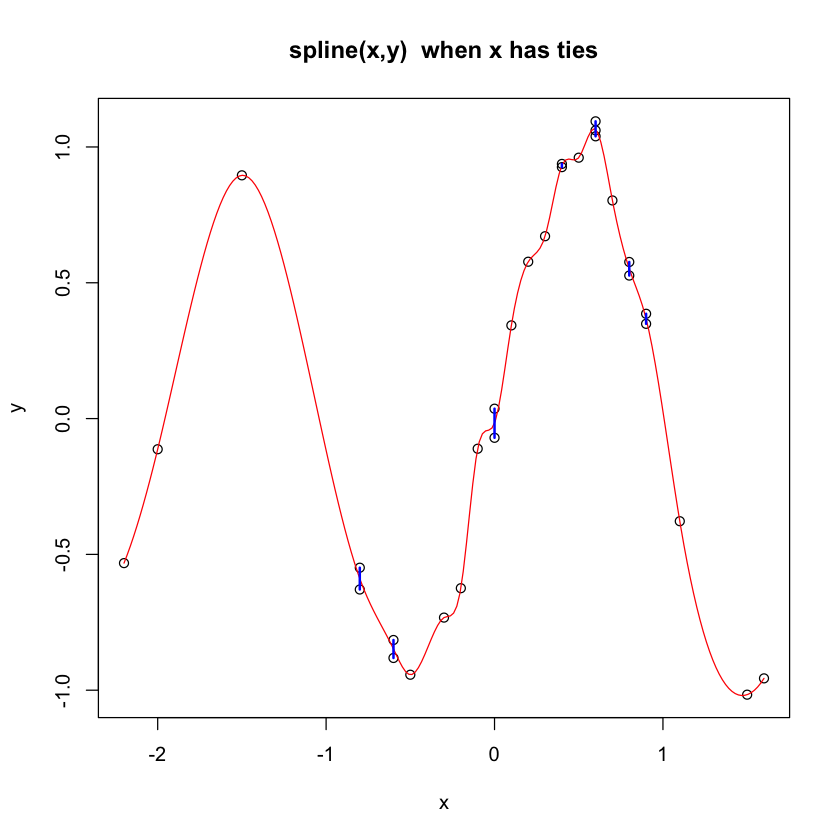

In [12]:
## An example with ties (non-unique  x values):
set.seed(1); x <- round(rnorm(30), 1); y <- sin(pi * x) + rnorm(30)/10
plot(x, y, main = "spline(x,y)  when x has ties")
lines(spline(x, y, n = 201), col = 2)
## visualizes the non-unique ones:
tx <- table(x); mx <- as.numeric(names(tx[tx > 1]))
ry <- matrix(unlist(tapply(y, match(x, mx), range, simplify = FALSE)),
             ncol = 2, byrow = TRUE)
segments(mx, ry[, 1], mx, ry[, 2], col = "blue", lwd = 2)

   Mode   FALSE    TRUE 
logical      22       7 

List of 2
 $ x: num [1:201] -3 -2.98 -2.95 -2.92 -2.9 ...
 $ y: num [1:201] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...


,x,y
Min.,-3.00,-1.07800000
1st Qu.,-1.75,-0.57050000
Median,-0.50,-0.13613265
Mean,-0.50,-0.08208311
3rd Qu.,0.75,0.50611122
Max.,2.00,1.03072752


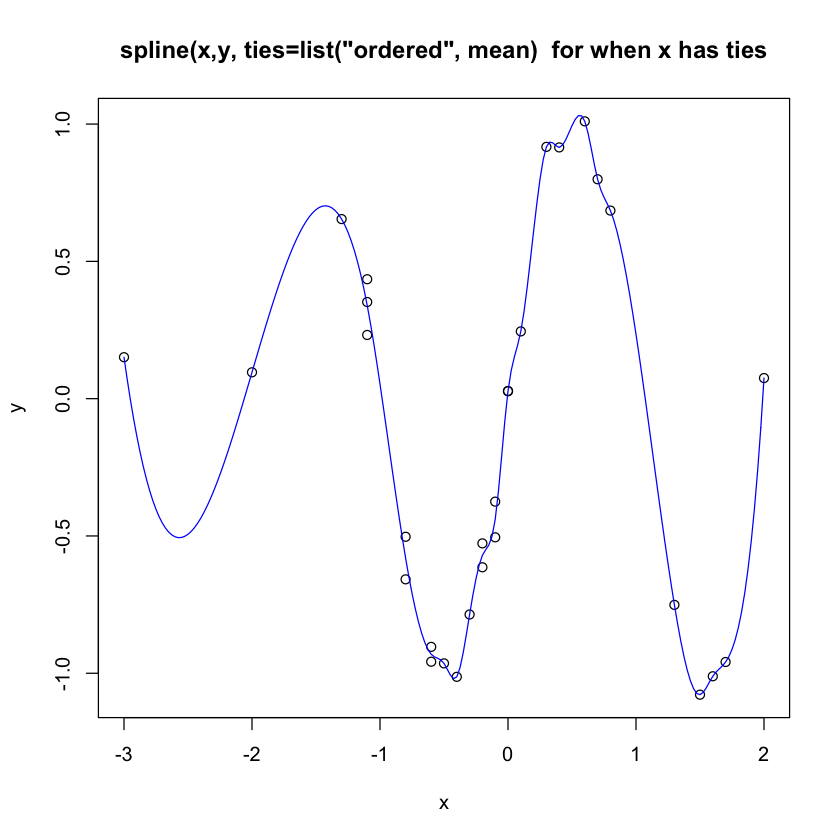

In [13]:
## Another example with sorted x, but ties:
set.seed(8); x <- sort(round(rnorm(30), 1)); y <- round(sin(pi * x) + rnorm(30)/10, 3)
summary(diff(x) == 0) # -> 7 duplicated x-values
str(spline(x, y, n = 201, ties="ordered")) # all '$y' entries are NaN
## The default (ties=mean) is ok, but most efficient to use instead is
sxyo <- spline(x, y, n = 201, ties= list("ordered", mean))
sapply(sxyo, summary)# all fine now
plot(x, y, main = "spline(x,y, ties=list(\"ordered\", mean)  for when x has ties")
lines(sxyo, col="blue")

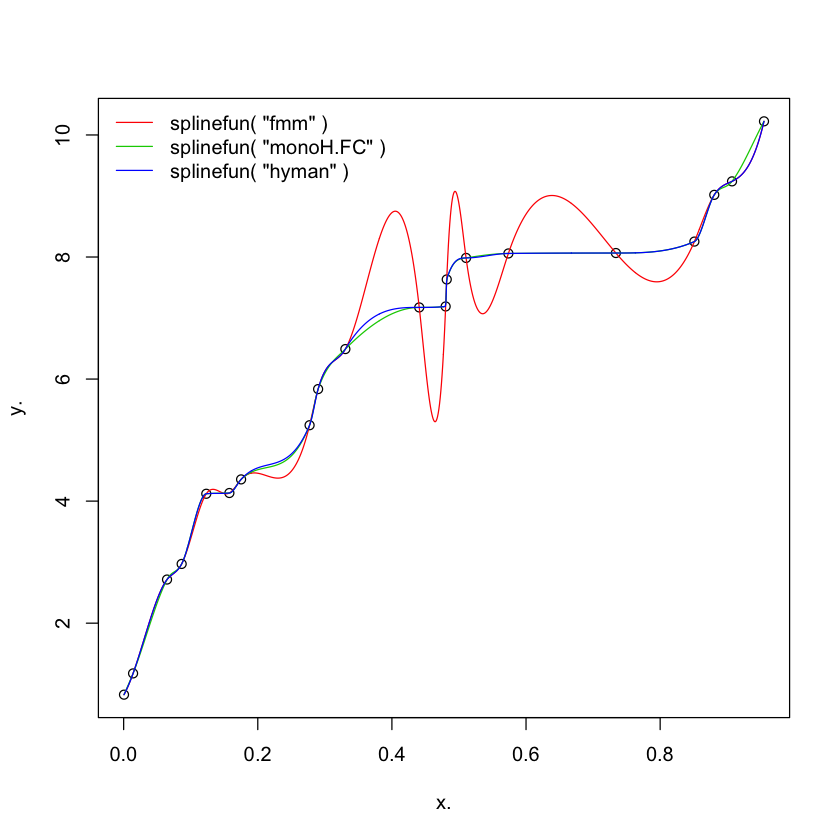

In [14]:
## An example of monotone interpolation
n <- 20
set.seed(11)
x. <- sort(runif(n)) ; y. <- cumsum(abs(rnorm(n)))
plot(x., y.)
curve(splinefun(x., y.)(x), add = TRUE, col = 2, n = 1001)
curve(splinefun(x., y., method = "monoH.FC")(x), add = TRUE, col = 3, n = 1001)
curve(splinefun(x., y., method = "hyman")   (x), add = TRUE, col = 4, n = 1001)
legend("topleft",
       paste0("splinefun( \"", c("fmm", "monoH.FC", "hyman"), "\" )"),
       col = 2:4, lty = 1, bty = "n")

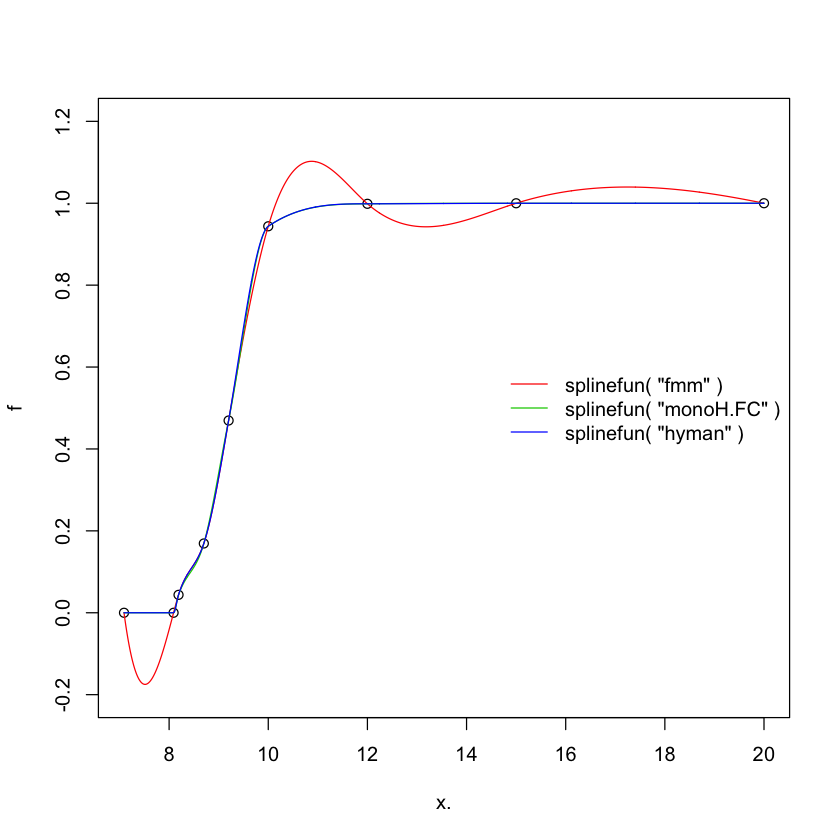

In [15]:
## and one from Fritsch and Carlson (1980), Dougherty et al (1989)
x. <- c(7.09, 8.09, 8.19, 8.7, 9.2, 10, 12, 15, 20)
f <- c(0, 2.76429e-5, 4.37498e-2, 0.169183, 0.469428, 0.943740,
       0.998636, 0.999919, 0.999994)
s0 <- splinefun(x., f)
s1 <- splinefun(x., f, method = "monoH.FC")
s2 <- splinefun(x., f, method = "hyman")
plot(x., f, ylim = c(-0.2, 1.2))
curve(s0(x), add = TRUE, col = 2, n = 1001) -> m0
curve(s1(x), add = TRUE, col = 3, n = 1001)
curve(s2(x), add = TRUE, col = 4, n = 1001)
legend("right",
       paste0("splinefun( \"", c("fmm", "monoH.FC", "hyman"), "\" )"),
       col = 2:4, lty = 1, bty = "n")

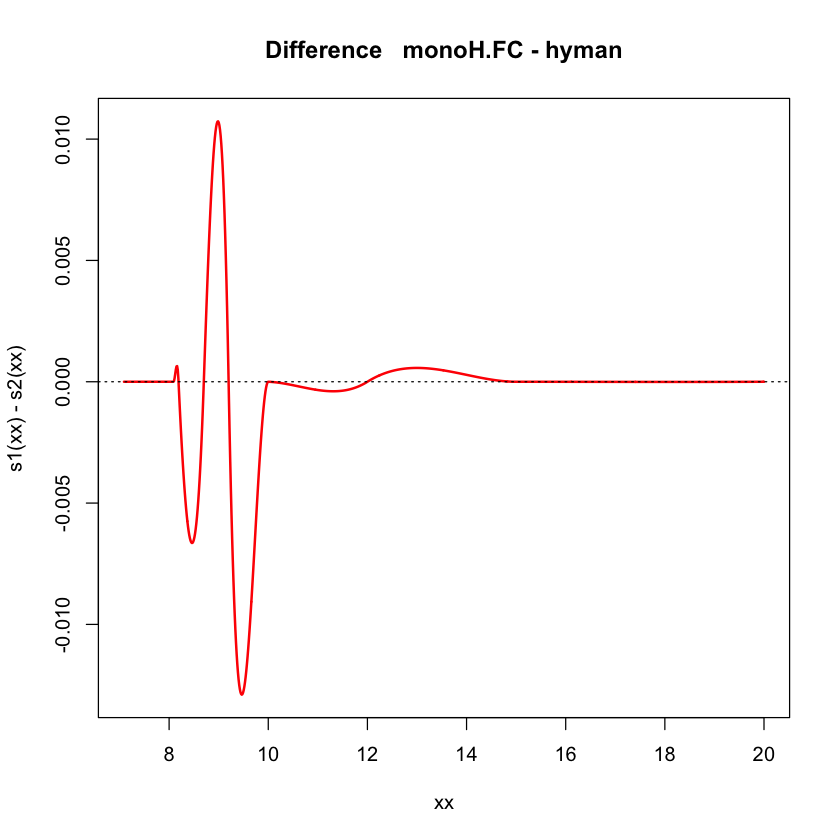

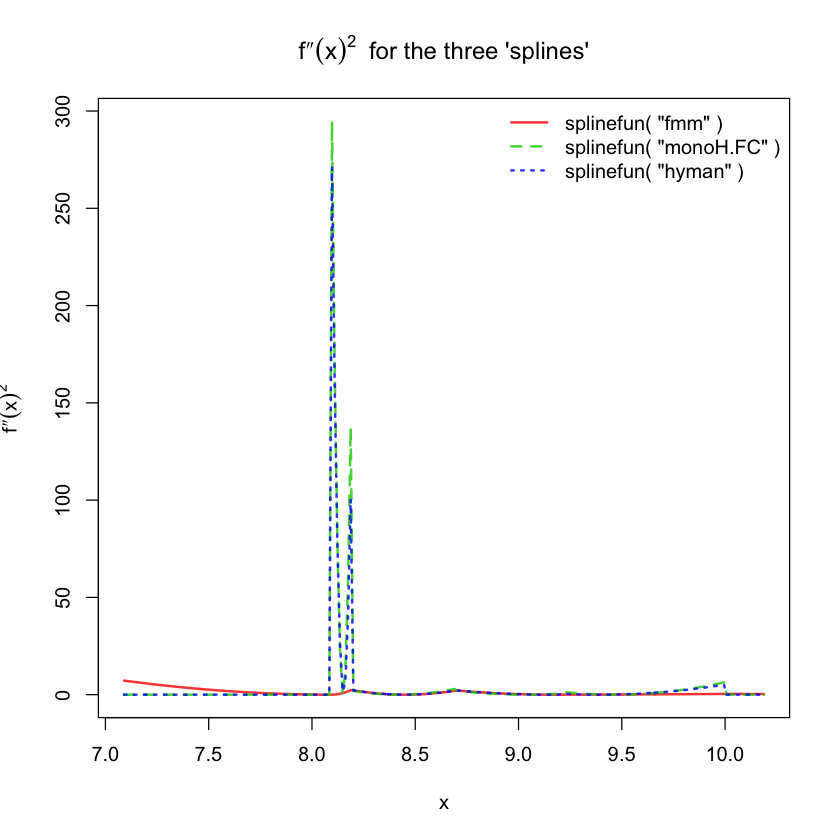

In [16]:
## they seem identical, but are not quite:
xx <- m0$x
plot(xx, s1(xx) - s2(xx), type = "l",  col = 2, lwd = 2,
     main = "Difference   monoH.FC - hyman"); abline(h = 0, lty = 3)

x <- xx[xx < 10.2] ## full range: x <- xx .. does not show enough
ccol <- adjustcolor(2:4, 0.8)
matplot(x, cbind(s0(x, deriv = 2), s1(x, deriv = 2), s2(x, deriv = 2))^2,
        lwd = 2, col = ccol, type = "l", ylab = quote({{f*second}(x)}^2),
        main = expression({{f*second}(x)}^2 ~" for the three 'splines'"))
legend("topright",
       paste0("splinefun( \"", c("fmm", "monoH.FC", "hyman"), "\" )"),
       lwd = 2, col  =  ccol, lty = 1:3, bty = "n")
## --> "hyman" has slightly smaller  Integral f''(x)^2 dx  than "FC",
## here, and both are 'much worse' than the regular fmm spline.
